In [1]:
from IPython.display import display, clear_output
%matplotlib inline
#%matplotlib notebook

# Importing required libraries 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Python code to view different plots about Simple Harmonic Motion as they propagate in time.

In [2]:
def xoa(t,k=1,m=1,g=9.8,x0=1,v0=1):
    omega0=np.sqrt(k/m)
    A,B=x0-(m*g/k),v0/omega0
    return A*np.cos(np.radians(omega0*t))+B*np.sin(np.radians(omega0*t))+m*g/k
def voa(t,k=1,m=1,g=9.8,x0=1,v0=1):
    omega0=np.sqrt(k/m)
    A,B=x0-(m*g/k),v0/omega0
    return -A*omega0*np.sin(np.radians(omega0*t))+B*omega0*np.cos(np.radians(omega0*t))
def aoa(t,k=1,m=1,g=9.8,x0=1,v0=1):
    omega0=np.sqrt(k/m)
    A,B=x0-(m*g/k),v0/omega0
    return -omega0**2*(A*np.cos(np.radians(omega0*t))+B*np.sin(np.radians(omega0*t)))

In [3]:
t=np.linspace(0,1000,1000)

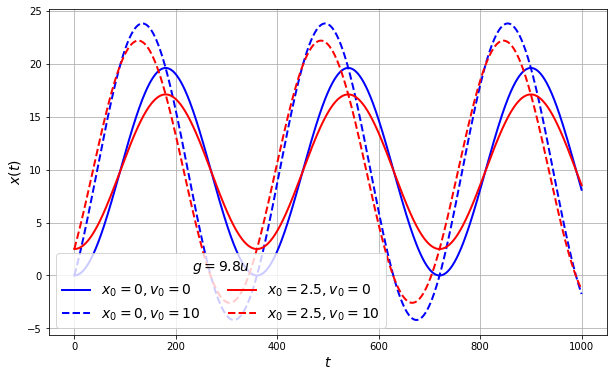

In [4]:
plt.figure(figsize=(10,6))
plt.plot(t,xoa(t,x0=0,v0=0),label=r'$x_0=0,v_0=0$',linestyle='-',color='b',lw=2)
plt.plot(t,xoa(t,x0=0,v0=10),label=r'$x_0=0,v_0=10$',linestyle='--',color='b',lw=2)
plt.plot(t,xoa(t,x0=2.5,v0=0),label=r'$x_0=2.5,v_0=0$',linestyle='-',color='r',lw=2)
plt.plot(t,xoa(t,x0=2.5,v0=10),label=r'$x_0=2.5,v_0=10$',linestyle='--',color='r',lw=2)
plt.legend(title=r'$g=9.8 u$',fontsize=14,title_fontsize=14,ncol=2,loc='best')
plt.xlabel(r"$t$",fontsize=14)
plt.ylabel(r"$x(t)$",fontsize=14)
plt.grid()
plt.savefig('fig1.png',bbox_inches='tight',transparent=True,dpi=300)
plt.show()

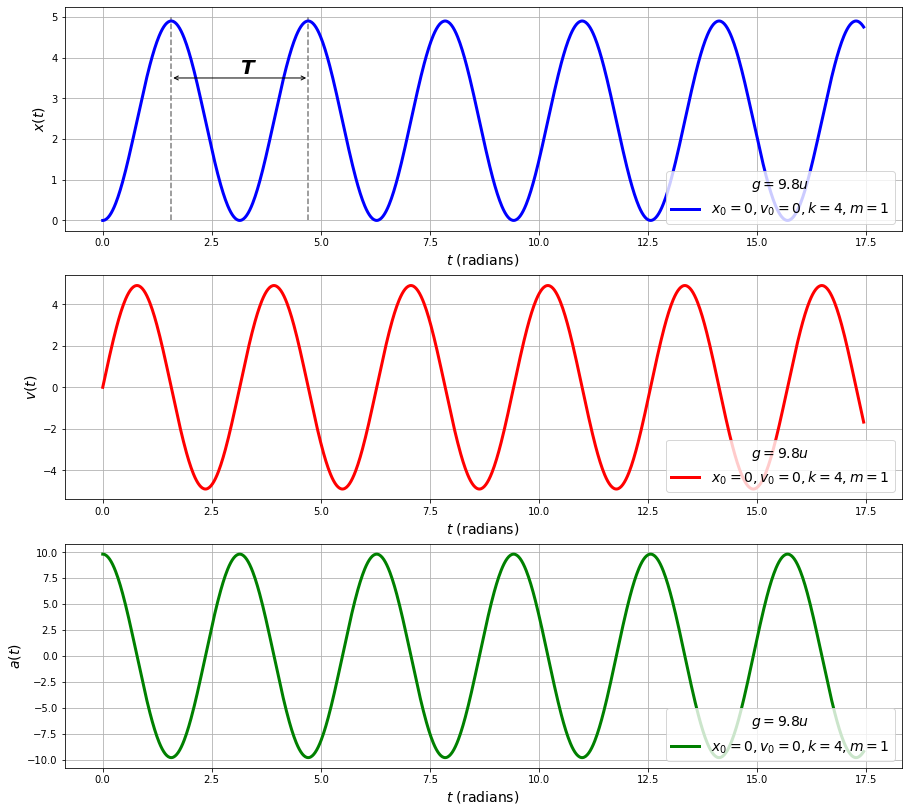

In [5]:
plt.figure(figsize=(15,14))
plt.subplot(3,1,1)
plt.plot(np.radians(t),xoa(t,x0=0,v0=0,k=4,m=1),label=r'$x_0=0,v_0=0,k=4,m=1$',linestyle='-',color='b',lw=3)
plt.legend(title=r'$g=9.8 u$',fontsize=14,title_fontsize=14,ncol=2,loc=4)
plt.xlabel(r"$t$ (radians)",fontsize=14)
plt.ylabel(r"$x(t)$",fontsize=14)
plt.vlines(np.pi/2,0,5,linestyle='--',color='gray')
plt.vlines(3*np.pi/2,0,5,linestyle='--',color='gray')
plt.annotate("", xy=(3*np.pi/2, 3.5), xytext=(np.pi/2, 3.5),arrowprops=dict(arrowstyle="<->"))
plt.text(2*np.pi/2,3.6,"T",fontsize=20,fontweight='bold',fontstyle='italic')

plt.grid()
plt.subplot(3,1,2)
plt.plot(np.radians(t),voa(t,x0=0,v0=0,k=4,m=1),label=r'$x_0=0,v_0=0,k=4,m=1$',linestyle='-',color='r',lw=3)
plt.legend(title=r'$g=9.8 u$',fontsize=14,title_fontsize=14,ncol=2,loc=4)
plt.xlabel(r"$t$ (radians)",fontsize=14)
plt.ylabel(r"$v(t)$",fontsize=14)
plt.grid()
plt.subplot(3,1,3)
plt.plot(np.radians(t),aoa(t,x0=0,v0=0,k=4,m=1),label=r'$x_0=0,v_0=0,k=4,m=1$',linestyle='-',color='g',lw=3)
plt.legend(title=r'$g=9.8 u$',fontsize=14,title_fontsize=14,ncol=2,loc=4)
plt.xlabel(r"$t$ (radians)",fontsize=14)
plt.ylabel(r"$a(t)$",fontsize=14)
plt.grid()
plt.savefig('fig2.png',bbox_inches='tight',transparent=True,dpi=300)
plt.show()

# Python code to animate wave motion and view different plots as they propagate in time.

In [6]:
# important variables in any simulation (step in seconds)
step = 0.5
numstep = 1000
# change to see the wave vary with amplitude
amp = 1.0

In [7]:
# Defining a function to compute the y values for plotting
freq = 0.05
def data_gen():
    # time variable starting at 0 seconds
    t = 0
    # plotting 1000 points iteratively
    ctr = 0
    for ctr in range(numstep):
        # calculating the y value for each wave at a given time (1 Hz)
        y1 = amp*np.sin(2*np.pi*freq*t)
        # SHM wave with twice the frequency
        y2 = amp*np.sin(2*np.pi*2*freq*t)
        # SHM wave with a damping coefficient i.e. damped sine wave
        # (decay OR damping constant = 0.25)
        y3 = amp*np.sin(2*np.pi*freq*t) * np.exp(-t*0.05)
        # moving through time in 0.05 second intervals i.e. stepping through time
        t += step
        yield t, y1, y2, y3

Text(0.5, 0, 'Time (s)')

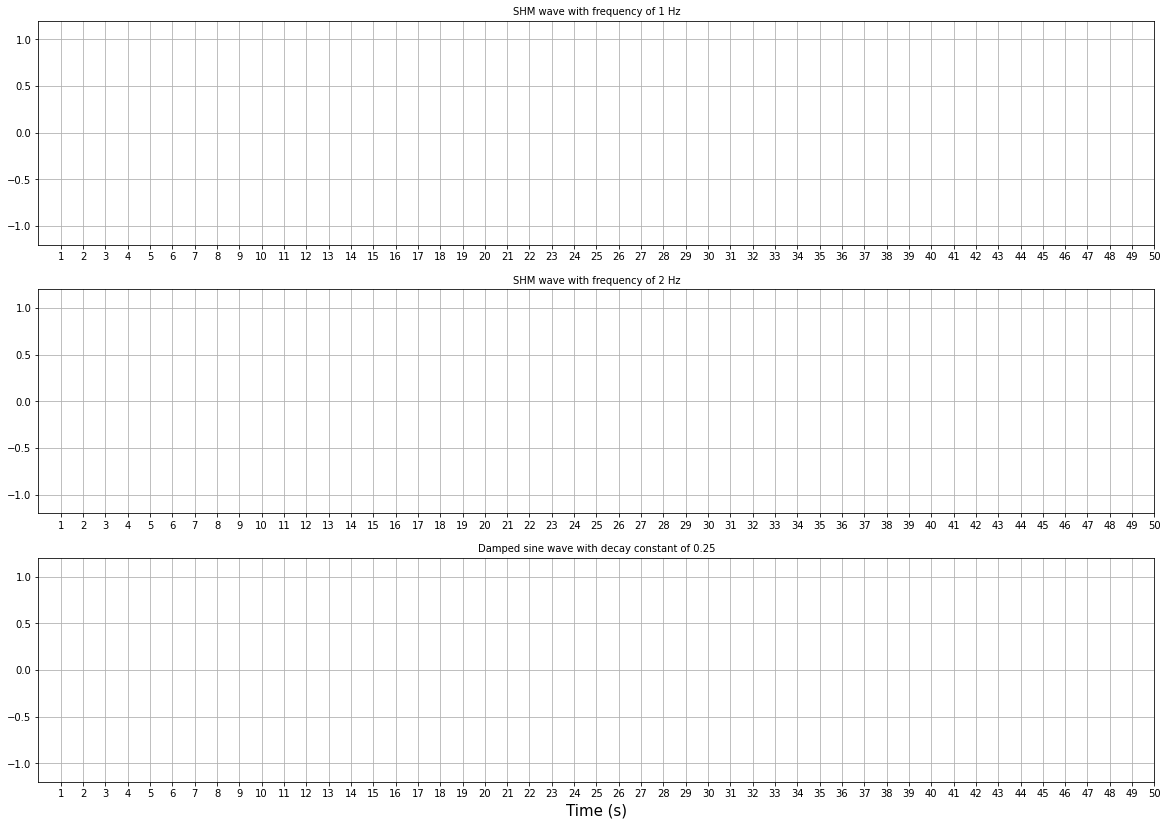

In [8]:
# create a figure with three subplots and set the size of the window
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(20,14))

# initializations to set the limits for each axis and introduce a grid
for ax in [ax1, ax2, ax3]:
    ax.set_ylim(-(amp+0.2), (amp+0.2))
    # change this for a simulation of a certain number of seconds (10 as of now)
    ax.set_xlim(0, 50)
    ax.grid()
    # introducing gridlines at each number between 1 and 10
    ax.set_xticks(np.arange(1,51))

# data arrays to store the values for plotting
# time in the X axis and values of the wave in the Y axis
xdata, y1data, y2data, y3data = [], [], [], []

# intialize three line objects (one in each subplot)
line1, = ax1.plot(xdata, y1data, color='b')
line2, = ax2.plot(xdata, y2data, color='r')
line3, = ax3.plot(xdata, y3data, color='g')
line = [line1, line2, line3]

# setting the title for each subplot 
ax1.set_title('SHM wave with frequency of 1 Hz', size=10)
ax2.set_title('SHM wave with frequency of 2 Hz', size=10)
ax3.set_title('Damped sine wave with decay constant of 0.25', size=10)

# labeling the x axis as time in seconds and setting the fontsize
ax3.set_xlabel('Time (s)', size=15)

In [9]:
# defining a function to obtain the data values
def calculate(data):
    # update the data
    x, y1, y2, y3 = data
    xdata.append(x)
    y1data.append(y1)
    y2data.append(y2)
    y3data.append(y3)

    # update the data of both line objects
    line[0].set_data(xdata, y1data)
    line[1].set_data(xdata, y2data)
    line[2].set_data(xdata, y3data)
    return line

In [10]:
ani = animation.FuncAnimation(fig, calculate, data_gen, blit=True, interval=500, repeat=True)
plt.show()

In [11]:
ani.save('SHM.mp4', fps=50, extra_args=['-vcodec', 'libx264'])